# Cifras Project Current Stage

- We have scrapped data from cifras.com.br website following their scraping rules.
- We also tried to get some data from Spotify following the API. However, we only got little information, about 4000 data points.
- After collecting data, we consolidate all information into a single file following a given standard.
- Now, let's check what our data looks like!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cifras_df = pd.read_csv("consolidate_cifras.csv", index_col=0)
cifras_df.head()

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
0,https://www.cifras.com.br/cifra/gesil-amarante...,gesil-amarante-jr,Gesil Amarante Jr,gospel,sou-um-milagre,Sou um Milagre,cifras/gesil-amarante-jr/sou-um-milagre.txt,F
1,https://www.cifras.com.br/cifra/may-soares/nao...,may-soares,May Soares,gospel,nao-passes-daqui,Não Passes Daqui,cifras/may-soares/nao-passes-daqui.txt,A
2,https://www.cifras.com.br/cifra/luciana-gomes/...,luciana-gomes,LUCIANA GOMES,gospel,consequencia-do-sucesso,Consequência do Sucesso,cifras/luciana-gomes/consequencia-do-sucesso.txt,A
3,https://www.cifras.com.br/cifra/gabriel-iglesi...,gabriel-iglesias,Gabriel Iglesias,mpb,velho-amor,Velho Amor,cifras/gabriel-iglesias/velho-amor.txt,A
4,https://www.cifras.com.br/cifra/indiegentes/eu...,indiegentes,Indiegentes,indie-rock,eu-nao-sou-teu-amigo,Eu Não Sou Teu Amigo,cifras/indiegentes/eu-nao-sou-teu-amigo.txt,Em


In [2]:
cifras_df.describe(include=[object])

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
count,90358,90358,90145,90358,90358,90145,90358,61978
unique,90357,21856,22601,76,67020,68750,90358,281
top,https://www.cifras.com.br/cifra/marcelo-aquino...,hinos-avulsos-ccb,Hinos Avulsos Ccb,nao-informada,saudade,Saudade,cifras/gesil-amarante-jr/sou-um-milagre.txt,G
freq,2,808,770,23135,84,83,1,9637


#### Initial comments:
- ```cifra_url``` should have only unique values, so it seems we have a duplicate.
- ```artist_name```, ```song_name``` and ```cifra_key``` have the same number of missing value (NaN).
- "nao-informada" is the most common artist music genre, which means that it is unknown.
- According to ```cifra_key```, there are 281 music keys, which is likely to contain wrong values that were acquired during scraping.  

In [3]:
cifras_df[cifras_df["cifra_url"].duplicated()]

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
4066,https://www.cifras.com.br/cifra/marcelo-aquino...,marcelo-aquino,Marcelo Aquino,nao-informada,teus-olhos-nao-mentem,Teus Olhos Não Mentem,cifras2/marcelo-aquino/teus-olhos-nao-mentem.txt,Eb


In [4]:
cifras_df[cifras_df["cifra_url"].duplicated()]["cifra_url"].item()

'https://www.cifras.com.br/cifra/marcelo-aquino/teus-olhos-nao-mentem'

In [5]:
cifras_df[cifras_df["cifra_url"] == cifras_df[cifras_df["cifra_url"].duplicated()]["cifra_url"].item()]

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
4059,https://www.cifras.com.br/cifra/marcelo-aquino...,marcelo-aquino,Marcelo Aquino,nao-informada,teus-olhos-nao-mentem,Teus Olhos Não Mentem,cifras/marcelo-aquino/teus-olhos-nao-mentem.txt,Eb
4066,https://www.cifras.com.br/cifra/marcelo-aquino...,marcelo-aquino,Marcelo Aquino,nao-informada,teus-olhos-nao-mentem,Teus Olhos Não Mentem,cifras2/marcelo-aquino/teus-olhos-nao-mentem.txt,Eb


**Let'S remove the duplicate!**

In [6]:
cifras_df = cifras_df.drop([4066])

In [7]:
cifras_df.describe(include=[object])

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
count,90357,90357,90144,90357,90357,90144,90357,61977
unique,90357,21856,22601,76,67020,68750,90357,281
top,https://www.cifras.com.br/cifra/gesil-amarante...,hinos-avulsos-ccb,Hinos Avulsos Ccb,nao-informada,saudade,Saudade,cifras/gesil-amarante-jr/sou-um-milagre.txt,G
freq,1,808,770,23134,84,83,1,9637


In [8]:
cifras_df[cifras_df["song_name"].isna()]

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
63226,https://www.cifras.com.br/cifra/industria-musi...,industria-musical,NaN,nao-informada,pare-o-casamento,NaN,cifras2/industria-musical/pare-o-casamento.txt,C
63227,https://www.cifras.com.br/cifra/primos-distant...,primos-distantes,NaN,nao-informada,dragao,NaN,cifras2/primos-distantes/dragao.txt,NaN
63228,https://www.cifras.com.br/cifra/jhonatan-da-si...,jhonatan-da-silva-reis,NaN,nao-informada,frio,NaN,cifras2/jhonatan-da-silva-reis/frio.txt,NaN
63229,https://www.cifras.com.br/cifra/viennah/nos-oc...,viennah,NaN,nao-informada,nos-oceanos-da-vida,NaN,cifras2/viennah/nos-oceanos-da-vida.txt,NaN
63230,https://www.cifras.com.br/cifra/doni-e-brener/...,doni-e-brener,NaN,sertanejo,a-beleza-do-sertao,NaN,cifras2/doni-e-brener/a-beleza-do-sertao.txt,NaN
...,...,...,...,...,...,...,...,...
63434,https://www.cifras.com.br/cifra/ze-barrero-e-c...,ze-barrero-e-catuaba,NaN,nao-informada,o-lobo-e-o-franca,NaN,cifras2/ze-barrero-e-catuaba/o-lobo-e-o-franca...,NaN
63435,https://www.cifras.com.br/cifra/ze-barrero-e-c...,ze-barrero-e-catuaba,NaN,nao-informada,singelo-mecanico,NaN,cifras2/ze-barrero-e-catuaba/singelo-mecanico.txt,G
63436,https://www.cifras.com.br/cifra/daniel-lorena/...,daniel-lorena,NaN,nao-informada,a-letra-a-rima-e-a-cancao,NaN,cifras2/daniel-lorena/a-letra-a-rima-e-a-canca...,NaN
63437,https://www.cifras.com.br/cifra/laercio-olivei...,laercio-oliveira,NaN,catolicas,sem-ti-nao-somos-nada,NaN,cifras2/laercio-oliveira/sem-ti-nao-somos-nada...,C


- As expected, there are 213 rows with missng ```artist_name``` and ```song_name``` column information.
- Instead of removing all those rows, we can just adapt url info.

In [9]:
na_rows = cifras_df[cifras_df["song_name"].isna()]
new_artist_name_col = [" ".join(url_artist.split("-")) for url_artist in na_rows["url_artist_name"]]
new_artist_name_col[0:4]

['industria musical', 'primos distantes', 'jhonatan da silva reis', 'viennah']

In [10]:
new_song_name_col = [" ".join(url_song.split("-")) for url_song in na_rows["url_song_name"]]
new_song_name_col[0:4]

['pare o casamento', 'dragao', 'frio', 'nos oceanos da vida']

In [11]:
na_rows.drop(columns=['artist_name','song_name'])

,cifra_url,url_artist_name,artist_genre,url_song_name,cifra_file_loc,cifra_key
63226,https://www.cifras.com.br/cifra/industria-musi...,industria-musical,nao-informada,pare-o-casamento,cifras2/industria-musical/pare-o-casamento.txt,C
63227,https://www.cifras.com.br/cifra/primos-distant...,primos-distantes,nao-informada,dragao,cifras2/primos-distantes/dragao.txt,NaN
63228,https://www.cifras.com.br/cifra/jhonatan-da-si...,jhonatan-da-silva-reis,nao-informada,frio,cifras2/jhonatan-da-silva-reis/frio.txt,NaN
63229,https://www.cifras.com.br/cifra/viennah/nos-oc...,viennah,nao-informada,nos-oceanos-da-vida,cifras2/viennah/nos-oceanos-da-vida.txt,NaN
63230,https://www.cifras.com.br/cifra/doni-e-brener/...,doni-e-brener,sertanejo,a-beleza-do-sertao,cifras2/doni-e-brener/a-beleza-do-sertao.txt,NaN
...,...,...,...,...,...,...
63434,https://www.cifras.com.br/cifra/ze-barrero-e-c...,ze-barrero-e-catuaba,nao-informada,o-lobo-e-o-franca,cifras2/ze-barrero-e-catuaba/o-lobo-e-o-franca...,NaN
63435,https://www.cifras.com.br/cifra/ze-barrero-e-c...,ze-barrero-e-catuaba,nao-informada,singelo-mecanico,cifras2/ze-barrero-e-catuaba/singelo-mecanico.txt,G
63436,https://www.cifras.com.br/cifra/daniel-lorena/...,daniel-lorena,nao-informada,a-letra-a-rima-e-a-cancao,cifras2/daniel-lorena/a-letra-a-rima-e-a-canca...,NaN
63437,https://www.cifras.com.br/cifra/laercio-olivei...,laercio-oliveira,catolicas,sem-ti-nao-somos-nada,cifras2/laercio-oliveira/sem-ti-nao-somos-nada...,C


In [12]:
new_rows = na_rows.drop(columns=['artist_name','song_name'])
new_rows['artist_name'] = new_artist_name_col
new_rows['song_name'] = new_song_name_col
new_rows.head()

,cifra_url,url_artist_name,artist_genre,url_song_name,cifra_file_loc,cifra_key,artist_name,song_name
63226,https://www.cifras.com.br/cifra/industria-musi...,industria-musical,nao-informada,pare-o-casamento,cifras2/industria-musical/pare-o-casamento.txt,C,industria musical,pare o casamento
63227,https://www.cifras.com.br/cifra/primos-distant...,primos-distantes,nao-informada,dragao,cifras2/primos-distantes/dragao.txt,NaN,primos distantes,dragao
63228,https://www.cifras.com.br/cifra/jhonatan-da-si...,jhonatan-da-silva-reis,nao-informada,frio,cifras2/jhonatan-da-silva-reis/frio.txt,NaN,jhonatan da silva reis,frio
63229,https://www.cifras.com.br/cifra/viennah/nos-oc...,viennah,nao-informada,nos-oceanos-da-vida,cifras2/viennah/nos-oceanos-da-vida.txt,NaN,viennah,nos oceanos da vida
63230,https://www.cifras.com.br/cifra/doni-e-brener/...,doni-e-brener,sertanejo,a-beleza-do-sertao,cifras2/doni-e-brener/a-beleza-do-sertao.txt,NaN,doni e brener,a beleza do sertao


In [13]:
cifras_df = cifras_df.dropna(subset=['song_name'])
cifras_df.describe(include=[object])

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
count,90144,90144,90144,90144,90144,90144,90144,61878
unique,90144,21802,22601,76,66889,68750,90144,281
top,https://www.cifras.com.br/cifra/gesil-amarante...,hinos-avulsos-ccb,Hinos Avulsos Ccb,nao-informada,saudade,Saudade,cifras/gesil-amarante-jr/sou-um-milagre.txt,G
freq,1,808,770,23050,84,83,1,9621


In [14]:
new_rows = new_rows[['cifra_url', 'url_artist_name', 'artist_name', 'artist_genre',
       'url_song_name', 'song_name', 'cifra_file_loc', 'cifra_key']]
cifras_df = pd.concat([cifras_df, new_rows], ignore_index=True)
cifras_df.describe(include=[object])

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
count,90357,90357,90357,90357,90357,90357,90357,61977
unique,90357,21856,22728,76,67020,68962,90357,281
top,https://www.cifras.com.br/cifra/gesil-amarante...,hinos-avulsos-ccb,Hinos Avulsos Ccb,nao-informada,saudade,Saudade,cifras/gesil-amarante-jr/sou-um-milagre.txt,G
freq,1,808,770,23134,84,83,1,9637


#### Cifra Key note information

- Now we need to address the missing values for ```cifra_key``` and some potential wrong values for that column.
- This information is very important so we can have a more general notation for our music chords (we will take a deep dive in this later).
- For missing values, we will simply remove those rows. Since we have a lot of data, even after removing those rows we might still have a decent dataset.

In [15]:
cifras_df.isna().sum()

cifra_url              0
url_artist_name        0
artist_name            0
artist_genre           0
url_song_name          0
song_name              0
cifra_file_loc         0
cifra_key          28380
dtype: int64

In [16]:
missing_key_cifras_df = cifras_df[cifras_df["cifra_key"].isna()]
valid_cifras_df = cifras_df[cifras_df["cifra_key"].notna()]

In [17]:
missing_key_cifras_df.head()

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
89,https://www.cifras.com.br/cifra/luiz-ricardo/c...,luiz-ricardo,Luiz Ricardo,sertanejo,cria-em-mim,Cria em Mim,cifras/luiz-ricardo/cria-em-mim.txt,NaN
90,https://www.cifras.com.br/cifra/raiz-worship/v...,raiz-worship,"Raiz Worship, Douglas Lira",gospel,vencendo-vem-jesus,Vencendo Vem Jesus,cifras/raiz-worship/vencendo-vem-jesus.txt,NaN
98,https://www.cifras.com.br/cifra/paulo-nascimen...,paulo-nascimento,Paulo Nascimento,gospel,orando-no-temporal,Orando no Temporal,cifras/paulo-nascimento/orando-no-temporal.txt,NaN
100,https://www.cifras.com.br/cifra/eliana-ribeiro...,eliana-ribeiro,Eliana Ribeiro,gospel,no-meu-coracao-hoje-e-natal,"No Meu Coração, Hoje É Natal",cifras/eliana-ribeiro/no-meu-coracao-hoje-e-na...,NaN
123,https://www.cifras.com.br/cifra/doros-minister...,doros-ministerio,Doros Ministério,gospel,nao-cabe-a-nos-te-questionar,Não Cabe a Nós Te Questionar,cifras/doros-ministerio/nao-cabe-a-nos-te-ques...,NaN


In [18]:
valid_cifras_df.head()

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
0,https://www.cifras.com.br/cifra/gesil-amarante...,gesil-amarante-jr,Gesil Amarante Jr,gospel,sou-um-milagre,Sou um Milagre,cifras/gesil-amarante-jr/sou-um-milagre.txt,F
1,https://www.cifras.com.br/cifra/may-soares/nao...,may-soares,May Soares,gospel,nao-passes-daqui,Não Passes Daqui,cifras/may-soares/nao-passes-daqui.txt,A
2,https://www.cifras.com.br/cifra/luciana-gomes/...,luciana-gomes,LUCIANA GOMES,gospel,consequencia-do-sucesso,Consequência do Sucesso,cifras/luciana-gomes/consequencia-do-sucesso.txt,A
3,https://www.cifras.com.br/cifra/gabriel-iglesi...,gabriel-iglesias,Gabriel Iglesias,mpb,velho-amor,Velho Amor,cifras/gabriel-iglesias/velho-amor.txt,A
4,https://www.cifras.com.br/cifra/indiegentes/eu...,indiegentes,Indiegentes,indie-rock,eu-nao-sou-teu-amigo,Eu Não Sou Teu Amigo,cifras/indiegentes/eu-nao-sou-teu-amigo.txt,Em


In [19]:
valid_cifras_df.isna().sum()

cifra_url          0
url_artist_name    0
artist_name        0
artist_genre       0
url_song_name      0
song_name          0
cifra_file_loc     0
cifra_key          0
dtype: int64

- After removing missing values from ```cifra_key``` column, let's check the wrong information inside that column.

In [20]:
valid_cifras_df['cifra_key'].unique()

array(['F', 'A', 'Em', 'Cm', 'D', 'Bbm', 'E', 'G', 'Fm', 'Am', 'G#m',
       'Db', 'C', 'Eb', 'Bm', 'B', 'Ab', 'Ebm', 'Dm', 'C#m', 'Bb', 'D#m',
       'G#', 'Cm/G', 'D#', 'F#m', 'C#', 'F#', 'Gm', 'A#', 'A#m', 'c',
       'A9', 'B e D', 'Gb', 'Emb', 'Am7', 'Dbm', 'Gbm', 'BEmADDCB', 'BB',
       '+68', 'B#m', '(Em', 'Em7/9', 'D/F#', 'Du', 'D6', 'C7+', 'C#m7/9',
       'Bm7/11', 'G9', 'F7M', 'E9', 'D9', 'G#m7', 'C9', 'D7', 'F#7M',
       'Dm7(9)', 'F#m7', 'A7', 'Bm7', 'A7M', 'Em7', 'E5', 'A6',
       '{{ userNam', 'F#mx', 'G6', 'C#m7', '(G', 'Abm', '(C/G', 'C#mD',
       'G#mb', 'G#x', 'G#7(13)', 'G7', 'AM', 'Bb+', 'F+', 'C/E', 'Gº',
       'Dm6', 'D7+', 'An', 'C#m7(9)', 'C7', 'B7', 'E7', 'Eb7', 'Ebm7',
       'Gm7', 'C7M', 'Dn', 'C#9', 'F7+', 'A5', 'Bb7M', 'Nenéo', 'D7/9',
       'E7M/9', 'Cm7', 'C(add9)', 'E7+', 'F9', 'C#m7/5-', 'G7+', 'Dm7',
       'A7+', 'F/G', 'Dm7/9', 'C6(9)', 'F#7', 'E7M', 'A#7M', 'F#º/A',
       'Abmaj7', 'D7M', 'C5', 'G#5', 'Gmaj7', 'Dmaj7', 'F5', 'Emaj7',
      

- For non-musicians, we are only expecting cifra keys in the format: A, A#, Am, A#m, Ab, Abm, and so on.
- So potentially, there is a lot of misleading information here. Some are quite obvious not cifra keys.

In [21]:
cifras_key = [[key,len(valid_cifras_df[valid_cifras_df['cifra_key']==key])] for key in valid_cifras_df['cifra_key'].unique()]
cifras_key[0:9]

[['F', 3121],
 ['A', 6570],
 ['Em', 2557],
 ['Cm', 911],
 ['D', 6950],
 ['Bbm', 251],
 ['E', 5503],
 ['G', 9637],
 ['Fm', 482]]

In [22]:
cifras_key = sorted(cifras_key,key=lambda x: x[1], reverse=True)
cifras_key[0:9]

[['G', 9637],
 ['C', 7604],
 ['D', 6950],
 ['A', 6570],
 ['E', 5503],
 ['Am', 3297],
 ['F', 3121],
 ['Em', 2557],
 ['Dm', 1912]]

- Fortunetely, the top 10 most common cifra keys in our dataset makes a lot of sense!

In [23]:
cifras_key

[['G', 9637],
 ['C', 7604],
 ['D', 6950],
 ['A', 6570],
 ['E', 5503],
 ['Am', 3297],
 ['F', 3121],
 ['Em', 2557],
 ['Dm', 1912],
 ['B', 1871],
 ['Bm', 1771],
 ['Bb', 1213],
 ['Gm', 1185],
 ['F#m', 962],
 ['Cm', 911],
 ['F#', 888],
 ['C#m', 821],
 ['Eb', 622],
 ['Ab', 516],
 ['Fm', 482],
 ['G#m', 392],
 ['Db', 372],
 ['C#', 259],
 ['Bbm', 251],
 ['G#', 209],
 ['D#', 187],
 ['A#', 168],
 ['Ebm', 136],
 ['D#m', 96],
 ['A7+', 82],
 ['Am7', 61],
 ['A#m', 57],
 ['G7+', 44],
 ['D7', 40],
 ['A7', 40],
 ['B7', 39],
 ['Dm7', 39],
 ['Bm7', 38],
 ['A9', 37],
 ['F7+', 36],
 ['Em7', 30],
 ['C7', 30],
 ['E7', 30],
 ['Gm7', 30],
 ['C7+', 29],
 ['G7', 28],
 ['A5', 27],
 ['C7M', 26],
 ['C9', 25],
 ['E7+', 23],
 ['D7+', 20],
 ['Cm7', 20],
 ['E5', 19],
 ['E9', 18],
 ['D9', 18],
 ['A7M', 18],
 ['D5', 18],
 ['F#m7', 16],
 ['G9', 15],
 ['Abm', 15],
 ['B5', 13],
 ['Am7/9', 13],
 ['Gb', 12],
 ['G7M', 12],
 ['C#m7', 11],
 ['Bb7+', 11],
 ['D7M', 10],
 ['Em7/9', 9],
 ['G#m7', 9],
 ['B7+', 9],
 ['D6/9', 9],
 ['G5'

- We can define cifra key pattern to filter out non-valid keys.

In [24]:
import re
def is_valid_key(key):
  valid_key_pattern = r"^[A-G](?:(#|b)?(?:m)?|(?:m)(#|b)?)*$"
  return bool(re.match(valid_key_pattern, key))

In [25]:
[[key[0],is_valid_key(key[0])] for key in cifras_key]

[['G', True],
 ['C', True],
 ['D', True],
 ['A', True],
 ['E', True],
 ['Am', True],
 ['F', True],
 ['Em', True],
 ['Dm', True],
 ['B', True],
 ['Bm', True],
 ['Bb', True],
 ['Gm', True],
 ['F#m', True],
 ['Cm', True],
 ['F#', True],
 ['C#m', True],
 ['Eb', True],
 ['Ab', True],
 ['Fm', True],
 ['G#m', True],
 ['Db', True],
 ['C#', True],
 ['Bbm', True],
 ['G#', True],
 ['D#', True],
 ['A#', True],
 ['Ebm', True],
 ['D#m', True],
 ['A7+', False],
 ['Am7', False],
 ['A#m', True],
 ['G7+', False],
 ['D7', False],
 ['A7', False],
 ['B7', False],
 ['Dm7', False],
 ['Bm7', False],
 ['A9', False],
 ['F7+', False],
 ['Em7', False],
 ['C7', False],
 ['E7', False],
 ['Gm7', False],
 ['C7+', False],
 ['G7', False],
 ['A5', False],
 ['C7M', False],
 ['C9', False],
 ['E7+', False],
 ['D7+', False],
 ['Cm7', False],
 ['E5', False],
 ['E9', False],
 ['D9', False],
 ['A7M', False],
 ['D5', False],
 ['F#m7', False],
 ['G9', False],
 ['Abm', True],
 ['B5', False],
 ['Am7/9', False],
 ['Gb', True],
 ['G

In [26]:
sum([key[1] if is_valid_key(key[0]) else 0 for key in cifras_key])

60561

In [27]:
sum([key[1] if not is_valid_key(key[0]) else 0 for key in cifras_key])

1416

In [28]:
len(valid_cifras_df)

61977

In [29]:
60561+1416

61977

- In summary, there are 1416 invalid cifra keys, and we will simply remove them from our dataset since it corresponds to only a small fraction.

In [30]:
valid_cifras_df[[is_valid_key(key) for key in valid_cifras_df['cifra_key']]]

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
0,https://www.cifras.com.br/cifra/gesil-amarante...,gesil-amarante-jr,Gesil Amarante Jr,gospel,sou-um-milagre,Sou um Milagre,cifras/gesil-amarante-jr/sou-um-milagre.txt,F
1,https://www.cifras.com.br/cifra/may-soares/nao...,may-soares,May Soares,gospel,nao-passes-daqui,Não Passes Daqui,cifras/may-soares/nao-passes-daqui.txt,A
2,https://www.cifras.com.br/cifra/luciana-gomes/...,luciana-gomes,LUCIANA GOMES,gospel,consequencia-do-sucesso,Consequência do Sucesso,cifras/luciana-gomes/consequencia-do-sucesso.txt,A
3,https://www.cifras.com.br/cifra/gabriel-iglesi...,gabriel-iglesias,Gabriel Iglesias,mpb,velho-amor,Velho Amor,cifras/gabriel-iglesias/velho-amor.txt,A
4,https://www.cifras.com.br/cifra/indiegentes/eu...,indiegentes,Indiegentes,indie-rock,eu-nao-sou-teu-amigo,Eu Não Sou Teu Amigo,cifras/indiegentes/eu-nao-sou-teu-amigo.txt,Em
...,...,...,...,...,...,...,...,...
90350,https://www.cifras.com.br/cifra/ze-barrero-e-c...,ze-barrero-e-catuaba,ze barrero e catuaba,nao-informada,janaina,janaina,cifras2/ze-barrero-e-catuaba/janaina.txt,Bm
90351,https://www.cifras.com.br/cifra/ze-barrero-e-c...,ze-barrero-e-catuaba,ze barrero e catuaba,nao-informada,meu-amigo-toin,meu amigo toin,cifras2/ze-barrero-e-catuaba/meu-amigo-toin.txt,Em
90353,https://www.cifras.com.br/cifra/ze-barrero-e-c...,ze-barrero-e-catuaba,ze barrero e catuaba,nao-informada,singelo-mecanico,singelo mecanico,cifras2/ze-barrero-e-catuaba/singelo-mecanico.txt,G
90355,https://www.cifras.com.br/cifra/laercio-olivei...,laercio-oliveira,laercio oliveira,catolicas,sem-ti-nao-somos-nada,sem ti nao somos nada,cifras2/laercio-oliveira/sem-ti-nao-somos-nada...,C


In [31]:
valid_cifras_df = valid_cifras_df[[is_valid_key(key) for key in valid_cifras_df['cifra_key']]]
valid_cifras_df.reset_index()
valid_cifras_df.describe(include=[object])

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
count,60561,60561,60561,60561,60561,60561,60561,60561
unique,60561,15271,15953,74,48463,49596,60561,37
top,https://www.cifras.com.br/cifra/gesil-amarante...,hinos-avulsos-ccb,Hinos Avulsos Ccb,nao-informada,saudade,Saudade,cifras/gesil-amarante-jr/sou-um-milagre.txt,G
freq,1,306,293,14523,62,61,1,9637


**Let's save this new dataset!**

In [32]:
valid_cifras_df.to_csv("valid_cifras.csv")

### Artist Genre

In [33]:
genres = [[genre,len(valid_cifras_df[valid_cifras_df['artist_genre']==genre])] for genre in valid_cifras_df['artist_genre'].unique()]
sorted(genres,key=lambda x: x[1], reverse=True)

[['nao-informada', 14523],
 ['gospel', 9902],
 ['sertanejo', 8058],
 ['mpb', 4291],
 ['samba-e-pagode', 2527],
 ['forro', 2509],
 ['pop-music', 2198],
 ['catolicas', 1907],
 ['rockn-roll', 1872],
 ['diversos', 1466],
 ['latinas', 1102],
 ['romantica', 897],
 ['rock-alternativo', 878],
 ['gauchas', 815],
 ['brasil', 784],
 ['regional', 751],
 ['brega', 747],
 ['velha-guarda', 634],
 ['reggae', 515],
 ['infantis', 458],
 ['jovem-guarda', 432],
 ['axe-music', 402],
 ['raphip-hop', 322],
 ['punk-rock', 293],
 ['fado', 259],
 [')', 223],
 ['funk', 222],
 ['bossa-nova', 180],
 ['pop-rock', 177],
 ['besteirol', 135],
 ['country', 101],
 ['espiritas', 93],
 ['rock-classico', 77],
 ['pisadinha', 76],
 ['worship', 67],
 ['hinos', 60],
 ['jazz', 58],
 ['samba-enredo', 50],
 ['filmes', 46],
 ['novelas', 44],
 ['oldies', 41],
 ['heavy-metal', 41],
 ['lambada', 38],
 ['blues', 36],
 ['folk', 30],
 ['indie', 25],
 ['especial-de-natal', 25],
 ['soul', 22],
 ['musica-crista', 21],
 ['eletronica', 20],


**There is one incorrect value ')'. Let's replace it to 'nao-informada'!**

In [34]:
new2replace_wrong_genre = valid_cifras_df[valid_cifras_df['artist_genre']==')'].drop(columns=['artist_genre'])
new2replace_wrong_genre['artist_genre'] = ['nao-informada']*len(new2replace_wrong_genre)
new2replace_wrong_genre = new2replace_wrong_genre[['cifra_url', 'url_artist_name', 'artist_name', 'artist_genre',
       'url_song_name', 'song_name', 'cifra_file_loc', 'cifra_key']]
new2replace_wrong_genre.head()

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key
18,https://www.cifras.com.br/cifra/tony-carreira/...,tony-carreira,Tony Carreira,nao-informada,a-sonhar-contigo,A Sonhar Contigo,cifras/tony-carreira/a-sonhar-contigo.txt,A
155,https://www.cifras.com.br/cifra/inezita-barros...,inezita-barroso,Inezita Barroso,nao-informada,taieiras,Taieiras,cifras/inezita-barroso/taieiras.txt,G
400,https://www.cifras.com.br/cifra/bittencourt/da...,bittencourt,"bittencourt, Juzé",nao-informada,danca-do-frio,Dança Do Frio,cifras/bittencourt/danca-do-frio.txt,Am
607,https://www.cifras.com.br/cifra/eder-palmieri/...,eder-palmieri,Eder Palmieri,nao-informada,pao-de-todo-dia,Pão de Todo Dia,cifras/eder-palmieri/pao-de-todo-dia.txt,G
1158,https://www.cifras.com.br/cifra/gatinha-manhos...,gatinha-manhosa,Gatinha Manhosa,nao-informada,isso-e-imortal,Isso É Imortal,cifras/gatinha-manhosa/isso-e-imortal.txt,Ab


In [35]:
correct_valid_cifras_df = valid_cifras_df[valid_cifras_df['artist_genre']!=')']
valid_cifras_df = pd.concat([correct_valid_cifras_df, new2replace_wrong_genre], ignore_index=True)
len(valid_cifras_df)

60561

In [36]:
genres = [[genre,len(valid_cifras_df[valid_cifras_df['artist_genre']==genre])] for genre in valid_cifras_df['artist_genre'].unique()]
genres = sorted(genres,key=lambda x: x[1], reverse=True)
np.array(genres)[:,0]

array(['nao-informada', 'gospel', 'sertanejo', 'mpb', 'samba-e-pagode',
       'forro', 'pop-music', 'catolicas', 'rockn-roll', 'diversos',
       'latinas', 'romantica', 'rock-alternativo', 'gauchas', 'brasil',
       'regional', 'brega', 'velha-guarda', 'reggae', 'infantis',
       'jovem-guarda', 'axe-music', 'raphip-hop', 'punk-rock', 'fado',
       'funk', 'bossa-nova', 'pop-rock', 'besteirol', 'country',
       'espiritas', 'rock-classico', 'pisadinha', 'worship', 'hinos',
       'jazz', 'samba-enredo', 'filmes', 'novelas', 'oldies',
       'heavy-metal', 'lambada', 'blues', 'folk', 'indie',
       'especial-de-natal', 'soul', 'musica-crista', 'eletronica', 'rb',
       'numetal', 'disco', 'autoconhecimento', 'indie-rock',
       'rock-grunge', 'dance-music', 'trap', 'indian', 'australiano',
       'mangue', 'opera', 'thrash-metal', 'umbanda', 'funk-carioca',
       'reggaeton', 'indie-pop', 'musical', 'Samba-Rock',
       'musica-nativista', 'jingle', 'rock-gotico', 'choro', 'k-

- Now that we have a correct list of music genres, let's draw some illustrations!

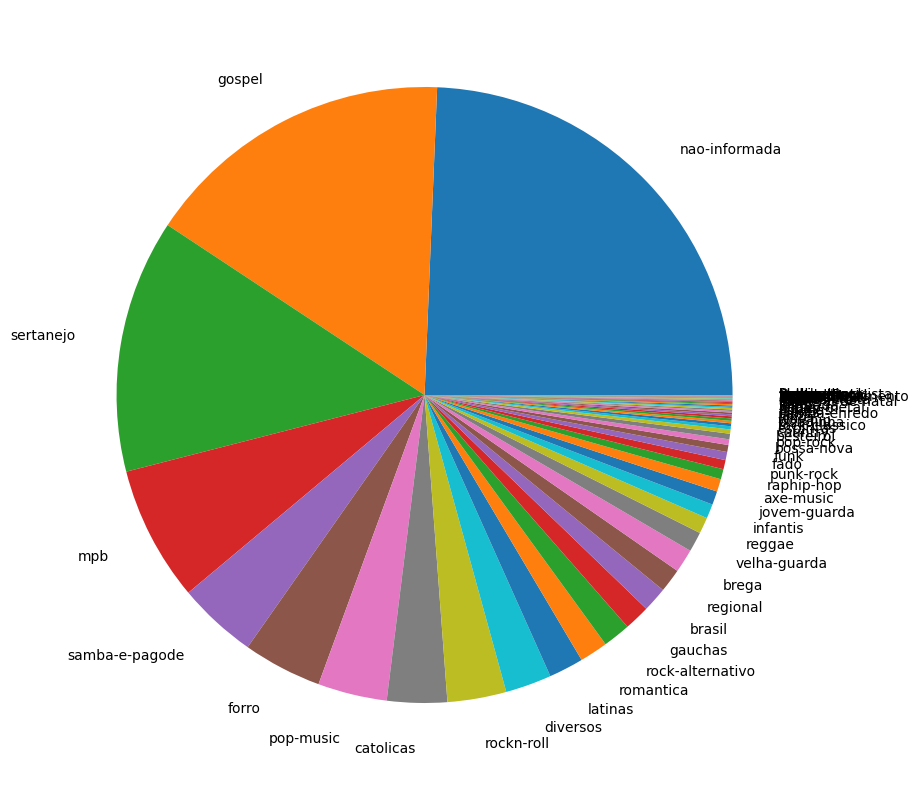

In [38]:
names=np.array(genres)[:,0]
values=np.array(genres)[:,1]

plt.figure(figsize=(10, 10))

plt.pie(values.astype(int), labels=names, labeldistance=1.15)
plt.show()

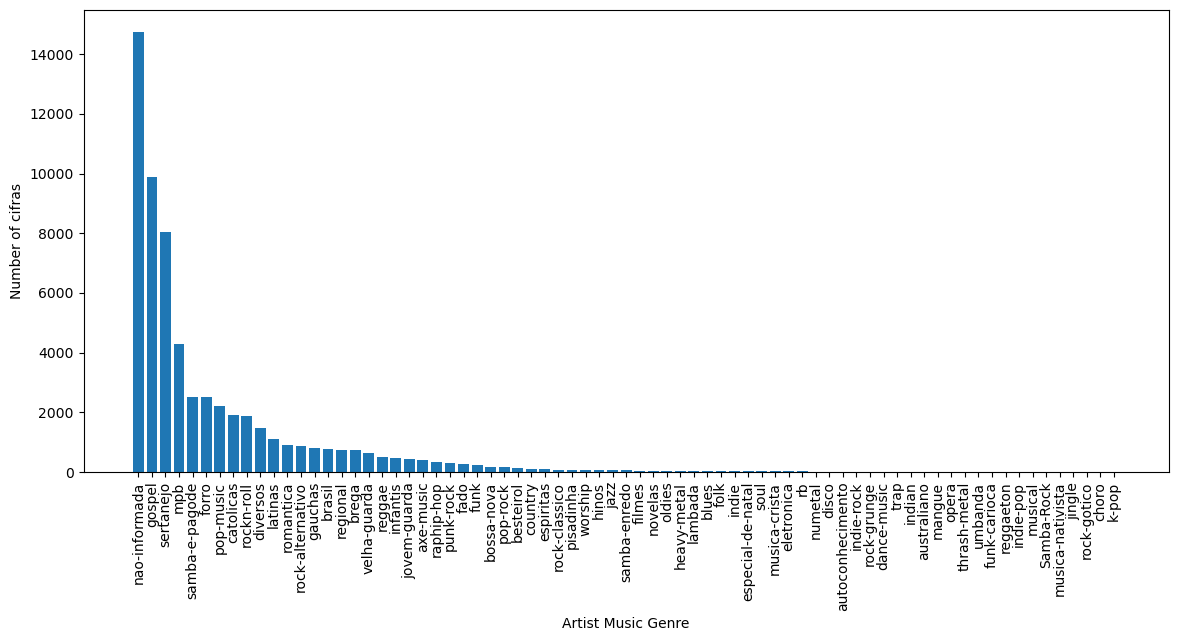

In [40]:
x_axis = np.arange(len(genres))
height = np.array(genres)[:,1].astype(int)
tick_label = np.array(genres)[:,0]

plt.figure(figsize=(14, 6))

plt.bar(x_axis, height, tick_label = tick_label, width=0.8)
 
plt.xlabel('Artist Music Genre')
plt.ylabel('Number of cifras')

plt.xticks(rotation=90)

plt.show()

In [41]:
valid_cifras_df.to_csv("valid_cifras.csv")

## Cifra data analysis

- The most relevant information in this dataset is present in the cifra text, so we need a function to retrieve it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

valid_cifras_df = pd.read_csv("valid_cifras.csv", index_col=0)

In [2]:
def return_cifra(cifra_df_item):
    cifra_file = cifra_df_item["cifra_file_loc"].item()
    with open(cifra_file, "r") as file:
        cifra = file.read()
    return cifra

In [3]:
print(return_cifra(valid_cifras_df.sample()))

Canta Moçada  -  Tonico  e Tinoco 
intr: C C7 F G C 

             G                 C 
Fim de baile, fim da noite  
        G            C  
É começo de sofrê  
        G                 C 
No peito fica a saudade  
                G                   C 
De quem teve um bem querê.  

                       C7                              F 
Canta , canta moçada que é de madrugada  
 G           C    F         C           Refrão                              
canta moçada Que é de madrugada 

   G                 C 
O galo ta cantando  
           C               C 
Não demora amanhecê  
        G                 C 
Meu cavalo ta arriado  
      G                   C 
Querendo eu levo você.               


    G                 C 
O suspiro são dobrado  
       C               C 
As morena soluçando  
          G                 C 
Meu amor eu já vou embora  
    G                 C 
O baile ta se acabano.                  


          G                 C 
A lembrança desse baile  
   

In [4]:
print(return_cifra(valid_cifras_df.sample()))

Intro Am  Abm 


    
        Abrir tablatura
        
    
          Am                               Abm 
E|----------------------------------------------------| 
B|-10--10-10-10-10-10--13-10-13-10---9--9-9-9-9-9-----| 
G|----------------------------------------------------| 
D|----------------------------------------------------| 
A|----------------------------------------------------| 
E|----------------------------------------------------| 

                      Am 
E|----------------------------------------------------| 
B|-12--9--12--9----10--10-10-10-10-10--13-10-13-10----| 
G|----------------------------------------------------| 
D|----------------------------------------------------| 

A|----------------------------------------------------| 
E|----------------------------------------------------| 

      Abm 
E|--12--12--12--12-10---------------------------------| 
B|-----------------------13--12--10-------------------| 
G|----------------------------------------------------

In [9]:
print(return_cifra(valid_cifras_df.sample()))


    
        Abrir tablatura
        
    
     
E|-----------------------------------| 
A|-----------------------------------| 
D|-----------------------------------| 
G|- 4-4-4-4----7-6-6-6-6-7---- 7-6-4-| 
B|-----7-7-7-5--------5-5------------| 
E|-----------------------------------| 
 

Bm	G                  D                A                Bm 
Alô bruninha? Quem é? Quem é? Sou eu, Sou eu, o cara do fiat uno. 
           G                       D              A                    Bm 
E ai? Qual é? Vamo sair, dar um rolé? Só se for agora, demorou então já é... 
               G                   D                    A                  Bm 
Então tá combinado, eu vou no fiat uno, com o somzão ligado, é de primeiro mundo. 
               G                      D                   A                  Bm 
Oi Bruna venha logo, por favor não demora, que o meu fiat uno, é o carrão da hora. 
                   G                       D                      A                    Bm 
Tenha cal

In [28]:
print(return_cifra(valid_cifras_df.sample()))

Intro: B, A, E 

    A                    
eu sei que ainda existe um lugar 
                         E 
um cantinho, uma porta aberta 
                 B 
esperando eu voltar 
  A 
e o lugar que é todo seu em mim 

ninguém entrou, ninguém pisou 
        E               B 
pois você ainda mora aqui 
 A                     
hoje sou um passarinho 
                           C#m 
que abandonou seu ninho e caiu 
      B 
se iludiu 
 A                       
mas todo mundo se engana 
                                C#m 
comigo  não foi diferente, eu errei 
         B 
hoje eu sei 

[Refrão] 
 C#m     A        E         B 
pássaro livre sem asas não voa 
C#m       A           E        B 
eu sem você, canção que não entoa 
C#m      A        E         B 
pássaro livre sem asas não voa 
  C#m     A      E        B     C#m, A, E, B   
quando se ama a gente perdoa... 
 

repete tudo


### Cifra Samples

- After looking at some samples, we can see a pattern of dual information, musical notes followed by lyrics.
- In some case, there is also information about the song melody, which is references as "tablatura".
- It would be interesting to extract only the music notes from each cifra text, so we can explore the song's harmony.

### Extract Song Musical Note Sequence (Harmony)
- To identify the lines of the text that corresponds to musical notes line, we can simply get the ones that have multiple space between characters.

In [43]:
cifra_samples = return_cifra(valid_cifras_df.sample())
print(cifra_samples)

F#       Am 
Você nao vê? 
Em          C#            F#       Am 
As vezes que eu falei pra me esquecer 
Em      C#        F#    Am    Em         C# 
É so desculpa pra tentar saber se ainda sou 
                  F#   B    Ab 
O que você sempre será pra mim 

F#    Am   Em      C#         F#      Am  
Me perdi nas horas que eu devia te mostrar 
Em        C#         F#     Am 
O quanto é bom poder te ver passar 
Em           C#          F#         B        Ab 
Mas nunca sei ao certo o que fazer pra te entender 

A Ab A          Dm   Em        A Ab A   
Mas sei que todo seu amor é meu 
Dm      Em   A Ab A           Dm    Em              C#   F#     
Só queria poder dizer que ninguém vai mudar nós dois 

Bb  Dm  C# (2x) 
Bb  Dm  Em  C# 

A Ab A          Dm   Em        A Ab A   
Mas sei que todo seu amor é meu 
Dm      Em   A Ab A           Dm    Em              C#   F#     
Só queria poder dizer que ninguém vai mudar nós dois


In [44]:
import re

def find_musical_notes_line(cifra_txt):
    pattern = r"[ ]{2,}"

    ret = []
    for line in cifra_txt.splitlines():
        if re.search(pattern, line):
            ret.append(line)
    return ret

print(find_musical_notes_line(cifra_samples))

['F#       Am ', 'Em          C#            F#       Am ', 'Em      C#        F#    Am    Em         C# ', '                  F#   B    Ab ', 'F#    Am   Em      C#         F#      Am  ', 'Em        C#         F#     Am ', 'Em           C#          F#         B        Ab ', 'A Ab A          Dm   Em        A Ab A   ', 'Dm      Em   A Ab A           Dm    Em              C#   F#     ', 'Bb  Dm  C# (2x) ', 'Bb  Dm  Em  C# ', 'A Ab A          Dm   Em        A Ab A   ', 'Dm      Em   A Ab A           Dm    Em              C#   F#     ']


In [45]:
len(find_musical_notes_line(cifra_samples))

13

**The function to return text lines of the cifra which contains musical notes works but not for all cases.**

- In the sample above, we counted 13 lines of music notes and found 13 lines as well.

In [46]:
cifra_samples = return_cifra(valid_cifras_df.sample())
print(cifra_samples)
print(find_musical_notes_line(cifra_samples))

D                        A         Bm 
Você inspira, qualquer poeta a compor 
         G              Em          A 
Você inspira qualquer artista a pintar 
       D            F#7          G 
Faz do homem, desiludido um sonhador 
        D             A                 D 
Ao lado de um grande homem, você vai estar 
                 A         Bm 
Faz o dia mais feliz amanhecer 
        G     Em          A 
Faz a fragilidade virtude ser 
         D           A            Bm 
Espero que essa canção possa buscar 
        D          A          D  A 
Mais carinho e respeito pra você 

[Refrão]
  D             A                   Bm 
Mulher,  você tem o brilho das estrelas 
G                D 
Dentro do seu olhar 
     A          G                D  A 
Na paz do teu abraço eu quero estar 
    D         A              Bm 
Mulher pra você Deus fez a flor 
     G              D 
Pro homem lhe entregar 
       A         G 
A mais linda criação 
      A              D  A 
Impossível não te amar 


## Music Notes Vocab

- In the sample above, we can see that our naive function also returns lyrics line as result.
- Let's deal with it, and try to build a vocabulary of music notes that appears in our cifra dataset.
- A vocabulary would help to search and find only music notes, which correspond to the music harmony.

In [50]:
print([line.split(" ") for line in find_musical_notes_line(cifra_samples)])

[['D', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'A', '', '', '', '', '', '', '', '', 'Bm', ''], ['', '', '', '', '', '', '', '', '', 'G', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Em', '', '', '', '', '', '', '', '', '', 'A', ''], ['', '', '', '', '', '', '', 'D', '', '', '', '', '', '', '', '', '', '', '', 'F#7', '', '', '', '', '', '', '', '', '', 'G', ''], ['', '', '', '', '', '', '', '', 'D', '', '', '', '', '', '', '', '', '', '', '', '', 'A', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'D', ''], ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'A', '', '', '', '', '', '', '', '', 'Bm', ''], ['', '', '', '', '', '', '', '', 'G', '', '', '', '', 'Em', '', '', '', '', '', '', '', '', '', 'A', ''], ['', '', '', '', '', '', '', '', '', 'D', '', '', '', '', '', '', '', '', '', '', 'A', '', '', '', '', '', '', '', '', '', '', '', 'Bm', ''], ['', '', '', '', '', '', '', '', 'D', '', '', 

In [54]:
print([item for line in find_musical_notes_line(cifra_samples) for item in line.split(" ")])

['D', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'A', '', '', '', '', '', '', '', '', 'Bm', '', '', '', '', '', '', '', '', '', '', 'G', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Em', '', '', '', '', '', '', '', '', '', 'A', '', '', '', '', '', '', '', '', 'D', '', '', '', '', '', '', '', '', '', '', '', 'F#7', '', '', '', '', '', '', '', '', '', 'G', '', '', '', '', '', '', '', '', '', 'D', '', '', '', '', '', '', '', '', '', '', '', '', 'A', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'D', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'A', '', '', '', '', '', '', '', '', 'Bm', '', '', '', '', '', '', '', '', '', 'G', '', '', '', '', 'Em', '', '', '', '', '', '', '', '', '', 'A', '', '', '', '', '', '', '', '', '', '', 'D', '', '', '', '', '', '', '', '', '', '', 'A', '', '', '', '', '', '', '', '', '', '', '', 'Bm', '', '', '', '', '', '', '', '', '', 'D', '', '', '', '', '', '',

In [55]:
print([item for line in find_musical_notes_line(cifra_samples) for item in line.split(" ") if item])

['D', 'A', 'Bm', 'G', 'Em', 'A', 'D', 'F#7', 'G', 'D', 'A', 'D', 'A', 'Bm', 'G', 'Em', 'A', 'D', 'A', 'Bm', 'D', 'A', 'D', 'A', 'D', 'A', 'Bm', 'Mulher,', 'você', 'tem', 'o', 'brilho', 'das', 'estrelas', 'G', 'D', 'A', 'G', 'D', 'A', 'D', 'A', 'Bm', 'G', 'D', 'A', 'G', 'A', 'D', 'A', 'D', 'A', 'Bm', 'Mulher,', 'você', 'tem', 'o', 'brilho', 'das', 'estrelas', 'G', 'D', 'A', 'G', 'D', 'A', 'D', 'A', 'Bm', 'G', 'D', 'A', 'G', 'A', 'D', 'A', 'G', 'A', 'D']


**Using function ```find_musical_notes_line``` to return the text lines which should correspond to the notes line and then splitting the lines into single "words" (or music notes), could be a simple way to find the music notes in the text. However, this would also return incorrect values, i.e. words.**

#### Return harmony, i.e. music notes from cifras text

In [56]:
def return_harmony(cifra_df_item):
    cifra_txt = return_cifra(cifra_df_item)
    musical_note_lines = find_musical_notes_line(cifra_txt)
    return [item for line in musical_note_lines for item in line.split(" ") if item]

In [62]:
cifra_sample = valid_cifras_df.sample()
print(return_cifra(cifra_sample))
print(return_harmony(cifra_sample))

(Intro) C G7 C G7 

C                                       G7 
Quando eu cheguei nesta cidade eu era assim 
                                        C 
Cheio de sonhos e de vontade dentro de mim 
            C7           F              G7 
Fiquei sozinho nesta cidade das multidões 
                                        C   G7 
Como falar, com as pessoas, se eram milhões ... 

 C                                       G7 
Andar na rua era um  mistério pro meu olhar 
                                   C 
O que fazer, pra onde ir, onde ficar 
             C7           F        G 
Levei meu canto pelo caminho da emoção 
           C        G7     F            C  G7 
Daquela gente perdida como eu na multidão. 

C                                             G7 
A minha história foi toda escrita pelo que eu vi 
                                           C 
Não inventei, nem disse nada que eu não senti 
         C7          F           G7 
Dizem que abuso muito do termo sentimental 

Mas cant

**Not very accurate, but return all music notes!**

In [63]:
cifra_sample = valid_cifras_df.sample()
print(return_cifra(cifra_sample))
print(return_harmony(cifra_sample))

(Intro) ( A E7 D A E7 A ) 

A 
Meu velho pai, preste atenção no que lhe digo. 
                                                                                   E7 
Meu pobre papai querido enxugue as lágrimas do rosto 
                                          D                E7 
Porque papai que você chora tão sozinho 
          D                       E7                                      A 
Me conta meu papaizinho o que lhe causa desgosto 
Estou notando que você está cansado 
                             A7                                                D 
Meu pobre, velho adorado é seu filho que está falando. 
                                       E7                A 
Quero saber qual é a tristeza que existe 
          F#m                 Bm           E7                         A 
Não quero ver você triste porque é que está chorando? 

A 
Quando lhe vejo, tão tristonho desse jeito. 
                                                                             E7 
Sinto estremec

**Works very well for this case!**

In [64]:
cifra_sample = valid_cifras_df.sample()
print(return_cifra(cifra_sample))
print(return_harmony(cifra_sample))

G#m                F#  
Me achego a ti, com temor  
E                              F#  
Eu sei que não mereço estar aqui  
G#m                     F#                         E  F#  
Mas só uma coisa me satisfaz, só uma coisa me satisfaz  
G#m                                                        F#  
Se pra carregar tua glória eu preciso estar coberto com sangue  
E                                             F#  
Dos sacrifícios que eu fiz ao longo do caminho  
G#m                                          F#  
Se há um preço a ser pago pra ter a tua glória  
                     E   F#  
Só uma coisa me satisfaz  
G#m                                            F#  
Neste lugar onde os anjos escondem o rosto de Ti  
                  E                    F#  
Neste lugar eu preciso, eu quero estar  
G#m                       F#                     E   F#  
Pois só uma coisa me satisfaz, só uma coisa me safistaz  

G#m                F#       E            F#  
A tua glória oh Deus, a t

**Very bad case!**

- Let's hope that function ```return_harmony``` works for most cases, and get mostly music notes returned after applying the function to whole dataset.

In [67]:
[row.artist_name for idx, row in valid_cifras_df.iloc[0:10].iterrows()]

['Gesil Amarante Jr',
 'May Soares',
 'LUCIANA GOMES',
 'Gabriel Iglesias',
 'Indiegentes',
 'COUT',
 'Comunidade Católica Rainha da Paz',
 'Os Garotin, Leo Guima',
 'Fernanda Baía',
 'Mara Lima']

In [76]:
valid_cifras_df.apply(return_harmony, axis=1)

AttributeError: 'str' object has no attribute 'item'

In [77]:
[return_harmony(valid_cifras_df.iloc[i]) for i in range(len(valid_cifras_df.iloc[:9]))]

AttributeError: 'str' object has no attribute 'item'

In [80]:
type(valid_cifras_df.iloc[0])

pandas.core.series.Series

In [81]:
type(valid_cifras_df.sample())

pandas.core.frame.DataFrame

In [82]:
type(valid_cifras_df.loc[0])

pandas.core.series.Series

**There was an error due to how the function was created. When looping through pandas dataframe, it returns a ```Series``` type. Our function was defined based on pandas sample function, which returns a ```DataFrame```. Therefore, we need to adapt ```return_cifra``` function to be able to deal with information coming from a loop.**

In [83]:
cifra_df_item = valid_cifras_df.iloc[0]
cifra_file = cifra_df_item["cifra_file_loc"].item()
with open(cifra_file, "r") as file:
    cifra = file.read()

AttributeError: 'str' object has no attribute 'item'

In [87]:
cifra_df_item = valid_cifras_df.iloc[0]
cifra_file = cifra_df_item["cifra_file_loc"]
print(cifra_file)
with open(cifra_file, "r") as file:
    cifra = file.read()

cifras/gesil-amarante-jr/sou-um-milagre.txt


In [88]:
def return_cifra(cifra_df_item):
    cifra_file = cifra_df_item["cifra_file_loc"]
    with open(cifra_file, "r") as file:
        cifra = file.read()
    return cifra

**Now we can use pandas function ```apply``` to run ```return_harmony``` for all rows (axis=1)**

In [89]:
valid_cifras_df.iloc[:9].apply(return_harmony, axis=1)

0    [Intro, Dm, C, E, F, Dm, Bb, F, Dm, Bb, F, Dm,...
1    [A, C#m, D, Não, ouve, filho, meu,, não, passe...
2    [C, D, G, C, Am, C/G, D/F#, G, G/B, C, G, Em, ...
3    [Intro, A7M, Bbº, Bm7, Cº, C#m7, Cº, Bm7, E5+,...
4    [Intro, Em, Bm, Am, Bm, Em, Bm, Bm, A#m, Am, B...
5    [Intro, C5, G5, C5, Ab5, C5, G5, Eb, F5, C5, G...
6    [Intro, D, G, Bm7, A4, A, D, D6, Acalma, teu, ...
7    [[Intro, ]F#7M, F7, Bbm7, Eb7, F#7M, F7, Bbm7,...
8    [Bb7M, C/Bb, Am7, C/D, D7, Gm7, Am7, Bb, Bb6, ...
dtype: object

In [91]:
[music_note for music_note in valid_cifras_df.iloc[:9].apply(return_harmony, axis=1)]

[['Intro',
  'Dm',
  'C',
  'E',
  'F',
  'Dm',
  'Bb',
  'F',
  'Dm',
  'Bb',
  'F',
  'Dm',
  'Bb',
  'F',
  'Gm',
  'Dm',
  'C',
  'Gm',
  'Dm',
  'C',
  'Dm',
  'Bb',
  'F',
  'Dm',
  'Bb',
  'F',
  'Gm',
  'Dm',
  'C',
  'Gm',
  'Dm',
  'C',
  'F',
  'C',
  'F',
  'C',
  'Bb',
  'Dm',
  'C',
  'Bb',
  'C',
  'Dm',
  'C',
  '(',
  'Dm',
  'C',
  'E',
  'F',
  'Dm',
  'Bb',
  'F',
  ')',
  'Dm',
  'Bb',
  'F',
  'Dm',
  'Bb',
  'F',
  'Gm',
  'Dm',
  'C',
  'Gm',
  'Dm',
  'C',
  'Dm',
  'Bb',
  'F',
  'Dm',
  'Bb',
  'F',
  'Gm',
  'Dm',
  'C',
  'F',
  'Am',
  'Bb',
  'Bb',
  'C',
  'F',
  'C',
  'F',
  'C',
  'Bb',
  'F',
  'C',
  'Am',
  'Dm',
  'C',
  '(',
  'Dm',
  'C/E',
  'F',
  'Dm',
  'Bb',
  'F',
  ')',
  'Gm',
  'Dm',
  'C',
  'Gm',
  'Dm',
  'C',
  'Gm',
  'Dm',
  'C',
  'F',
  'Am',
  'Bb',
  'Bb',
  'C',
  'F',
  'C',
  'F',
  'C',
  'Bb',
  'Dm',
  'C',
  'Bb',
  'C',
  'Dm',
  'C',
  'Bb'],
 ['A',
  'C#m',
  'D',
  'Não',
  'ouve',
  'filho',
  'meu,',
  'não',
  'p

In [95]:
def flatten(lst):
    flat_list = []
    for item in lst:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

In [96]:
flatten([music_note for music_note in valid_cifras_df.iloc[:9].apply(return_harmony, axis=1)])

['Intro',
 'Dm',
 'C',
 'E',
 'F',
 'Dm',
 'Bb',
 'F',
 'Dm',
 'Bb',
 'F',
 'Dm',
 'Bb',
 'F',
 'Gm',
 'Dm',
 'C',
 'Gm',
 'Dm',
 'C',
 'Dm',
 'Bb',
 'F',
 'Dm',
 'Bb',
 'F',
 'Gm',
 'Dm',
 'C',
 'Gm',
 'Dm',
 'C',
 'F',
 'C',
 'F',
 'C',
 'Bb',
 'Dm',
 'C',
 'Bb',
 'C',
 'Dm',
 'C',
 '(',
 'Dm',
 'C',
 'E',
 'F',
 'Dm',
 'Bb',
 'F',
 ')',
 'Dm',
 'Bb',
 'F',
 'Dm',
 'Bb',
 'F',
 'Gm',
 'Dm',
 'C',
 'Gm',
 'Dm',
 'C',
 'Dm',
 'Bb',
 'F',
 'Dm',
 'Bb',
 'F',
 'Gm',
 'Dm',
 'C',
 'F',
 'Am',
 'Bb',
 'Bb',
 'C',
 'F',
 'C',
 'F',
 'C',
 'Bb',
 'F',
 'C',
 'Am',
 'Dm',
 'C',
 '(',
 'Dm',
 'C/E',
 'F',
 'Dm',
 'Bb',
 'F',
 ')',
 'Gm',
 'Dm',
 'C',
 'Gm',
 'Dm',
 'C',
 'Gm',
 'Dm',
 'C',
 'F',
 'Am',
 'Bb',
 'Bb',
 'C',
 'F',
 'C',
 'F',
 'C',
 'Bb',
 'Dm',
 'C',
 'Bb',
 'C',
 'Dm',
 'C',
 'Bb',
 'A',
 'C#m',
 'D',
 'Não',
 'ouve',
 'filho',
 'meu,',
 'não',
 'passe',
 'daqui',
 'A',
 'C#m',
 'D',
 'Nem',
 'tão',
 'pouco',
 'vás',
 'colher',
 'em',
 'outro',
 'campo',
 'A',
 'C#m',
 'D',
 'N

**After getting all music notes found by ```return_harmony``` in the first 10 rows of our dataset, we have to flatten the array and use ```value_counts``` of pandas Series to get an ordered list of most common music notes.**

In [100]:
all_notes = pd.Series(flatten([music_note for music_note in valid_cifras_df.iloc[:9].apply(return_harmony, axis=1)]))
sorted_notes = all_notes.value_counts().index
print(sorted_notes)

Index(['D', 'Bm', 'C', 'Dm', 'F', 'A', 'Bb', 'G', 'Am', 'G5',
       ...
       'noite', 'Maria', 'então,', 'Recebe,', 'cuidará', 'está', 'contigo',
       'ser', 'envolve', 'Fará'],
      dtype='object', length=210)


In [101]:
all_notes = flatten([music_note for music_note in valid_cifras_df.apply(return_harmony, axis=1)])
all_notes = pd.Series(all_notes)
sorted_notes = all_notes.value_counts().index
print(sorted_notes)

Index(['G', 'D', 'C', 'A', 'E', 'F', 'Am', 'Em', 'Bm', 'B',
       ...
       'desamarra', 'Porem,ninguém', 'clame.', '\t\tG#m\tF#m\t\tB', 'Dúvida',
       'suponho', 'margens,', 'habito', 'medito;',
       'E|-5-5-5-5--8-8-8--6-6-6--6-6-6--5-5-5-4--3-3-1-0-1-|'],
      dtype='object', length=105155)


In [104]:
sorted_notes[0:100]

Index(['G', 'D', 'C', 'A', 'E', 'F', 'Am', 'Em', 'Bm', 'B', 'Dm', 'F#m', 'Bb',
       'C#m', 'A7', 'F#', 'Gm', 'B7', 'que', 'E7', 'D7', 'Am7', 'de', 'G7',
       'o', 'a', 'Cm', 'Bm7', 'Em7', 'G#m', 'Eb', 'eu', 'C7', 'C9', 'D/F#',
       'não', 'Dm7', '(', ')', 'e', 'C#', 'Fm', 'me', 'G#', 'A9', 'é', 'G/B',
       'F#m7', 'C#m7', 'Ab', 'Gm7', 'D9', 'F#7', 'pra', 'te', 'você', 'meu',
       'C7M', 'Eu', 'do', 'um', 'se', 'Intro:', 'D#', 'em', 'no', 'E/G#',
       'Cm7', 'F7M', 'amor', 'D7M', 'Bbm', 'F7', 'Intro', 'G7M', 'A/C#', 'A#',
       'D#m', 'A7M', 'mais', 'O', 'G#m7', 'C#7', 'B9', 'da', 'na', 'Que',
       'por', 'Db', '-', 'C/E', 'com', 'Não', 'Abrir', 'tablatura', 'minha',
       '\t', 'vai', 'G9', 'seu'],
      dtype='object')

- As expected, we got natural music notes (C,D,E,...) as the most common notes.
- Unfortunately, we got some common Portuguese words as well, such as articles 'o' and 'a'.
- 'a' is very problematic, because it can be either an article or a music note (La).

In [105]:
sorted_notes[101:200]

Index(['só', 'uma', 'Bb7', 'mim', 'Fm7', 'vida', 'F/A', 'Se', 'D4', 'Bb7M',
       'Mas', 'quero', 'É', 'G#7', 'sem', 'tudo', 'A#m', 'coração', 'Deus',
       'A4', 'ser', 'B/D#', 'tem', 'F9', 'os', 'E9', 'para', 'E7M', 'sei',
       'G6', 'sou', 'C/G', 'Solo', 'E4', 'Ebm', 'as', 'Bb9', 'teu', '|',
       'como', 'já', 'ao', '[Refrão]', 'Você', 'A5', 'D5', 'G5', 'la', 'dia',
       'Me', 'Gb', 'quem', 'bem', 'Eb7M', 'Bbm7', 'Am/G', 'Final', 'ver',
       'gente', 'sempre', 'Pra', 'D7/9', 'tempo', 'G7+', 'mundo', 'sua',
       'D7(9)', 'tão', 'F7+', 'foi', 'B5', 'C7+', 'vem', 'G4', 'faz', 'tu',
       '(2x)', 'A7+', 'nos', 'D#m7', 'quando', 'D7+', 'De', 'Quando', 'C5',
       'assim', 'Eb7', 'Gm6', 'B4', 'Em7(9)', 'mas', 'E5', 'ela', 'C/D', '/',
       'Por', 'aqui', 'está', '\t\t'],
      dtype='object')

In [106]:
sorted_notes[201:300]

Index(['No', 'Só', 'Senhor', 'B7M', 'Meu', 'y', 'G/A', 'nada', 'nem', 'D/A',
       'Bb/D', 'Am6', 'todo', 'ter', 'Ele', 'F/G', 'E7/9', 'Te', 'viver',
       'Jesus', 'A6', 'G#º', 'tua', 'F/C', 'lá', 'vez', 'C7/9', 'ele', 'F#/A#',
       'dos', 'D#7', 'até', 'ti', 'quer', 'D#º', 'pode', 'Abm', 'A/B', 'Com',
       'nunca', 'el', 'Bm/A', 'fazer', 'meus', 'G/D', 'E7(9)', 'agora', 'amar',
       'D9/F#', 'Quem', 'Na', 'nós', 'tenho', 'Um', 'esse', 'Ab7M', 'nosso',
       'C7(9)', 'noite', 'Ebm7', 'D/E', 'era', 'céu', 'oh', 'Solo:', 'mi',
       'há', 'D6', 'onde', 'C#9', 'sol', 'estou', 'Dm/C', 'Como', 'dizer',
       'en', 'Pois', 'amor,', 'Vou', 'Ab7', 'essa', 'muito', 'C#º', 'C4',
       'Em7/9', 'ou', 'lugar', 'tá', 'D/C', 'olhar', 'ninguém', 'E7/9-', 'Teu',
       'Vem', 'saudade', 'olhos', 'tanto', 'A/G', 'Eb/G'],
      dtype='object')

### Music Notes Vocab not practical using naive function

- I was expecting to build a music notes vocabulary by using a naive function to split lyrics and music notes lines.
- Unfortunately, many words come out of this naive function, turning our approach to build a music vocab not possible.
- Then, let's search for a pattern using library ```re``` to get only music notes to build a music vocab.
- A music vocab would be very useful so we can extract only the music harmony information from cifras, and then have some insights with this data.
- Also, we can transform this information using the base key and simplify the music notation.

In [1]:
import re
def find_musical_notes_line(cifra_txt):
    pattern = r"[ ]{3,}"

    ret = []
    for line in cifra_txt.splitlines():
        if re.search(pattern, line):
            ret.append(line)
    return ret

def return_harmony(cifra_df_item):
    cifra_txt = return_cifra(cifra_df_item)
    musical_note_lines = find_musical_notes_line(cifra_txt)
    return [item for line in musical_note_lines for item in line.split(" ") if item]

In [2]:
import pandas as pd

valid_cifras_df = pd.read_csv("valid_cifras.csv", index_col=0)

def return_cifra(cifra_df_item):
    cifra_file = cifra_df_item["cifra_file_loc"]
    with open(cifra_file, "r") as file:
        cifra = file.read()
    return cifra

In [3]:
def flatten(lst):
    flat_list = []
    for item in lst:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

all_notes = flatten([music_note for music_note in valid_cifras_df.apply(return_harmony, axis=1)])
all_notes = pd.Series(all_notes)
sorted_notes = all_notes.value_counts().index
print(sorted_notes[:100])

Index(['G', 'D', 'C', 'A', 'E', 'F', 'Am', 'Em', 'Bm', 'B', 'Dm', 'F#m', 'Bb',
       'A7', 'C#m', 'F#', 'Gm', 'B7', 'E7', 'D7', 'Am7', 'G7', 'Cm', 'Bm7',
       'Em7', 'G#m', 'Eb', 'C7', 'C9', 'D/F#', 'Dm7', 'C#', 'Fm', 'G#', 'A9',
       'G/B', 'F#m7', 'que', 'C#m7', 'Gm7', 'Ab', 'F#7', 'D9', 'de', 'o', 'a',
       'C7M', 'D#', 'E/G#', 'Cm7', 'F7M', 'D7M', 'F7', 'eu', 'Bbm', 'G7M',
       'A/C#', 'A#', 'D#m', 'não', 'A7M', 'C#7', 'e', 'G#m7', 'me', 'B9', 'é',
       'Abrir', 'tablatura', 'Db', 'C/E', '\t', 'G9', 'Bb7', 'você', 'te',
       'Fm7', 'pra', '-', 'do', 'meu', 'F/A', 'Eu', 'se', 'Bb7M', 'D4', 'G#7',
       'A#m', 'um', 'em', 'amor', 'no', 'A4', 'B/D#', 'F9', 'E9', 'G6', 'E7M',
       'C/G', 'E4'],
      dtype='object')


In [4]:
def is_valid_key(key):
#     valid_key_pattern = r"^[A-G](?:(#|b|[4-9])?(?:(m|M|º|dim|/|\+|\-|add|maj))?(?:([4-9]|\(4\)|\(9\)|9|\(11\)|11|\(13\)|13|(5-)|(5+))?)|/[A-G])*$"
    valid_key_pattern = "^[A-G](?:(#|b|[2-9])?"
    valid_key_pattern += "(?:(m|M|º|°|dim|/|\+|\-|add|maj|sus))?"
    valid_key_pattern += "(?:([2-9]))?"
    valid_key_pattern += "(?:(\())?"
#     valid_key_pattern += "(?:(\(4\)|\(4/9\)|\(9\)|\(9-\)|\(9+\)|\(b9\)|9|\(11\)|11|\(13\)|\(13-\)|\(b13\)|\(13+\)|13|\(5-\)|\(b5\)|\(5+\))?)"
    valid_key_pattern += "(?:(4|4/9|9|9-|9+|b9||11|13|13-|b13|13+|5-|b5|5+)?)"
    valid_key_pattern += "(?:(\)))?"
    valid_key_pattern += "|/[A-G])*$"

    return bool(re.match(valid_key_pattern, key))

print(f"These are music notes:")
print([note for note in sorted_notes[:1000] if is_valid_key(note)])
print()
print(f"These are NOT music notes:")
print([note for note in sorted_notes[:1000] if not is_valid_key(note)])

These are music notes:
['G', 'D', 'C', 'A', 'E', 'F', 'Am', 'Em', 'Bm', 'B', 'Dm', 'F#m', 'Bb', 'A7', 'C#m', 'F#', 'Gm', 'B7', 'E7', 'D7', 'Am7', 'G7', 'Cm', 'Bm7', 'Em7', 'G#m', 'Eb', 'C7', 'C9', 'D/F#', 'Dm7', 'C#', 'Fm', 'G#', 'A9', 'G/B', 'F#m7', 'C#m7', 'Gm7', 'Ab', 'F#7', 'D9', 'C7M', 'D#', 'E/G#', 'Cm7', 'F7M', 'D7M', 'F7', 'Bbm', 'G7M', 'A/C#', 'A#', 'D#m', 'A7M', 'C#7', 'G#m7', 'B9', 'Db', 'C/E', 'G9', 'Bb7', 'Fm7', 'F/A', 'Bb7M', 'D4', 'G#7', 'A#m', 'A4', 'B/D#', 'F9', 'E9', 'G6', 'E7M', 'C/G', 'E4', 'Ebm', 'Bb9', 'Gb', 'G5', 'Bbm7', 'Am/G', 'A5', 'Eb7M', 'D5', 'D7/9', 'G7+', 'F7+', 'D7(9)', 'C7+', 'G4', 'A7+', 'D7+', 'B5', 'D#m7', 'Eb7', 'Gm6', 'B4', 'Em7(9)', 'C/D', 'C5', 'G/A', 'E5', 'D/A', 'Am6', 'Bb/D', 'B7M', 'E7/9', 'F/G', 'A6', 'G#º', 'C7/9', 'D#7', 'D#º', 'F/C', 'F#/A#', 'Abm', 'Bm/A', 'A/B', 'D9/F#', 'E7(9)', 'G/D', 'D/E', 'Ebm7', 'Ab7M', 'C7(9)', 'C#9', 'Dm/C', 'D6', 'Ab7', 'Em7/9', 'E7/9-', 'C#º', 'D/C', 'C4', 'A/G', 'F#º', 'F6', 'Fº', 'Eb/G', 'Bb7+', 'F#5', 'Dm7(

### Music note pattern

- After some iterations trying to find a music note pattern for ```re``` library, we found a function capable of splitting valid music notes from common lyric words.
- There are some reference to song's part, like the chorus written in Pt "[Refrão]", or the introduction keys written 'Intro:'. In fact, for "[Refrão]", there are some cases where music notes don't have spaces between, like '[Refrão]G'.
- There is also some spelling music notes problem, either of having one or both brackets "(",")". For example: '(A' and '(G)'. So we need to adapt the function to consider these cases.
- Also, there can be tabs "\t", but we can just remove all tabs to solve this one.

In [5]:
print(f"These are music notes:")
print([note for note in sorted_notes[1001:2000] if is_valid_key(note)])
print()
print(f"These are NOT music notes:")
print([note for note in sorted_notes[1001:2000] if not is_valid_key(note)])

These are music notes:
['F7M/A', 'C7/13', 'Gm7(11)', 'Bm/F#', 'Fm7/9', 'Eb6', 'F7(13)', 'Em7+', 'G7M/B', 'D7(4/9)', 'C#m6', 'F#7(b13)', 'C9/E', 'Gm9', 'Abdim', 'A#/D', 'C#°', 'G6(9)', 'F#m7/11', 'D7/C', 'D4/7', 'Edim', 'E7/4', 'Csus', 'D/F', 'F#7(5+)', 'F)', 'Am11', 'C7/9+', 'Cm/Eb', 'Bb7M(9)', 'F#m7/E', 'Bsus4', 'F#m/C#', 'Ebm6', 'A#°', 'Bm7+', 'G7(b13)', 'Bm/D', 'E11', 'Gm5+', 'C°', 'D5/A', 'B4/7/9', 'D#m7(9)', 'D11/F#', 'E/C#', 'F#7(13)', 'C#7+', 'D#m5-/7', 'G7/D', 'Gm7+', 'F#m7+', 'Am7/11', 'A7M/9', 'C#6', 'B°', 'Bsus', 'Em/F#', 'F#maj7', 'Cm7/Bb', 'A9/E', 'C5(9)', 'Db/Eb', 'D9/E', 'C#maj7', 'Em/C#', 'D4/F#', 'Bb7/13', 'Em5+', 'Csus4', 'Fm/Eb', 'D#m7(b5)', 'D/Gb', 'Gm7/F', 'A9/F#', 'D7(9+)', 'A7sus4', 'B)', 'E/G', 'F#m7M', 'Fsus4', 'Gm11', 'Gm7(5-)', 'F#7/4', 'EM', 'C#/G#', 'G#m7/5-', 'C#m9', 'F#m/A', 'Bb/Ab', 'Gm/D', 'Gm7/11', 'D#m7/5-', 'Db7/9', 'B7(b13)', 'D9/B', 'E/Ab', 'Am)', 'F#7/9-', 'A7(9-)', 'F#m9', 'F#/C#', 'A7(5+)', 'G#7/13', 'Db5', 'G#m11', 'F#4/7', 'D9/G', 'C7/G', 'Dm/

#### Adapt pattern function:
1. Allow "(" to be start a music note.
2. Allow other ponctuation to finish a music note, such as "*", ".", and ",".
3. Remove "\t" and "[Refrão]" for white space to avoid problem not getting music notes.

In [6]:
def is_valid_key(key):
    valid_key_pattern = "^(?:\()?[A-G]"
    valid_key_pattern += "(?:(#|b|[2-9])?"
    valid_key_pattern += "(?:(m|M|º|°|dim|/|\+|\-|add|maj|sus))?"
    valid_key_pattern += "(?:([2-9]))?"
    valid_key_pattern += "(?:(\())?"
    valid_key_pattern += "(?:(4|4/9|9|9-|9+|b9||11|13|13-|b13|13+|5-|b5|5+)?)"
    valid_key_pattern += "(?:(\)))?"
    valid_key_pattern += "|/[A-G])*"
    valid_key_pattern += "(?:[,.]|\*)?$"

    return bool(re.match(valid_key_pattern, key))

print(f"These are music notes:")
print([note for note in sorted_notes[:2000] if is_valid_key(note)])
print()
print(f"These are NOT music notes:")
print([note for note in sorted_notes[:2000] if not is_valid_key(note)])


These are music notes:
['G', 'D', 'C', 'A', 'E', 'F', 'Am', 'Em', 'Bm', 'B', 'Dm', 'F#m', 'Bb', 'A7', 'C#m', 'F#', 'Gm', 'B7', 'E7', 'D7', 'Am7', 'G7', 'Cm', 'Bm7', 'Em7', 'G#m', 'Eb', 'C7', 'C9', 'D/F#', 'Dm7', 'C#', 'Fm', 'G#', 'A9', 'G/B', 'F#m7', 'C#m7', 'Gm7', 'Ab', 'F#7', 'D9', 'C7M', 'D#', 'E/G#', 'Cm7', 'F7M', 'D7M', 'F7', 'Bbm', 'G7M', 'A/C#', 'A#', 'D#m', 'A7M', 'C#7', 'G#m7', 'B9', 'Db', 'C/E', 'G9', 'Bb7', 'Fm7', 'F/A', 'Bb7M', 'D4', 'G#7', 'A#m', 'A4', 'B/D#', 'F9', 'E9', 'G6', 'E7M', 'C/G', 'E4', 'Ebm', 'Bb9', 'Gb', 'G5', 'Bbm7', 'Am/G', 'A5', 'Eb7M', 'D5', 'D7/9', 'G7+', 'F7+', 'D7(9)', 'C7+', 'G4', 'A7+', 'D7+', 'B5', 'D#m7', 'Eb7', 'Gm6', 'B4', 'Em7(9)', 'C/D', 'C5', 'G/A', 'E5', 'D/A', 'Am6', 'Bb/D', 'B7M', 'E7/9', 'F/G', 'A6', 'G#º', 'C7/9', 'D#7', 'D#º', 'F/C', 'F#/A#', 'Abm', 'Bm/A', 'A/B', 'D9/F#', 'E7(9)', 'G/D', 'D/E', 'Ebm7', 'Ab7M', 'C7(9)', 'C#9', 'Dm/C', 'D6', 'Ab7', 'Em7/9', 'E7/9-', 'C#º', 'D/C', 'C4', 'A/G', 'F#º', 'F6', 'Fº', 'Eb/G', 'Bb7+', 'F#5', 'Dm7(

## Get Music chords from cifras

- Now we have a function that can distinguish music chords from other strings in cifras.
- In Portuguese, "A" and "E" can happen in the beggining of a phrase, so for these cases it will not be simple to ensure it is a chord.
- Keeping that in mind, we can use our new method to extract the harmony from the cifras by getting the music chords.
- But we still have to remove "\t" and "[Refrão]" 

In [7]:
import re

def return_harmony(cifra_df_item):
    def is_valid_chord(key):
        valid_key_pattern = "^(?:\()?[A-G]"
        valid_key_pattern += "(?:(#|b|[2-9])?"
        valid_key_pattern += "(?:(m|M|º|°|dim|/|\+|\-|add|maj|sus))?"
        valid_key_pattern += "(?:([2-9]))?"
        valid_key_pattern += "(?:(\())?"
        valid_key_pattern += "(?:(4|4/9|9|9-|9+|b9||11|13|13-|b13|13+|5-|b5|5+)?)"
        valid_key_pattern += "(?:(\)))?"
        valid_key_pattern += "|/[A-G])*"
        valid_key_pattern += "(?:[,.]|\*)?$"

        return bool(re.match(valid_key_pattern, key))

    # Get cifra text
    cifra_txt = return_cifra(cifra_df_item)
    
    # Remove \t, \n and "[Refrão]"
    cifra_txt = cifra_txt.replace("\n", " ")
    cifra_txt = cifra_txt.replace("\t", "   ")
    cifra_txt = cifra_txt.replace("[Refrão]", " ")
        
    # Return only valid music chords
    music_chords = [item for item in cifra_txt.split(" ") if is_valid_chord(item)]
    return str(music_chords)

In [8]:
it = 9856

print("Harmony:")
print(return_harmony(valid_cifras_df.iloc[it]))
print()
print("Cifra:")
print(return_cifra(valid_cifras_df.iloc[it]))

Harmony:
['G', 'D', 'C', 'A', 'G', 'D', 'C', 'G', 'D', 'C', 'Am', 'Bm', 'D', 'G', 'D', 'C', 'G', 'D', 'C', 'G', 'D', 'C', 'Am', 'Bm', 'D', 'Em', 'D', 'Em', 'D', 'Em', 'D', 'C', 'G', 'Em', 'D', 'Em', 'D', 'Em', 'D', 'C', 'G', 'Em', 'D', 'Em', 'D', 'Em', 'D', 'C', 'G', 'Em', 'D', 'Em', 'D', 'Em', 'D', 'Am', 'C', 'G', 'D', 'C', 'G', 'D', 'C', 'G', 'D', 'C', 'Am', 'Bm', 'D', 'G', 'D', 'C', 'A', 'G', 'D', 'C', 'G', 'D', 'C', 'Am', 'Bm', 'D', 'G', 'D', 'C', 'G', 'D', 'C', 'G', 'D', 'C', 'Am', 'Bm', 'D', 'Em', 'D', 'Em', 'D', 'Em', 'D', 'C', 'G', 'Em', 'D', 'Em', 'D', 'Em', 'D', 'C', 'G', 'Em', 'D', 'Em', 'D', 'Em', 'D', 'C', 'G', 'Em', 'D', 'Em', 'D', 'Em', 'D', 'Am', 'C', 'G', 'D', 'C', 'C', 'Em', 'D/F#', 'G', 'C', 'Em', 'D/F#', 'G', 'C', 'Em', 'D/F#', 'G', 'C', 'Em', 'D/F#', 'G', 'C', 'Em', 'D/F#', 'G', 'C', 'Em', 'D/F#', 'G', 'C', 'Em', 'D/F#', 'G', 'C', 'Em', 'D/F#', 'G', 'C', 'Em', 'D/F#', 'G', 'C', 'Em', 'D/F#', 'G']

Cifra:
G          D            C 
A vida é um enigma que eu quero de

**Now, let's add the harmony information to our dataframe as a new column**

In [9]:
valid_cifras_df.iloc[:9].apply(return_harmony, axis=1)

0    ['Dm', 'C', 'E', 'F', 'Dm', 'Bb', 'F', 'Dm', '...
1    ['A', 'C#m', 'D', 'A', 'C#m', 'D', 'A', 'C#m',...
2    ['G', 'C', 'D', 'G', 'C', 'Am', 'C/G', 'D/F#',...
3    ['A7M', 'Bbº', 'Bm7', 'Cº', 'C#m7', 'Cº', 'Bm7...
4    ['Em', 'Bm', 'Am', 'Bm', 'Em', 'Bm', 'Bm', 'A#...
5    ['C5', 'G5', 'C5', 'Ab5', 'C5', 'G5', 'Eb', 'F...
6    ['D', 'G', 'Bm7', 'A4', 'A', 'D', 'D6', 'Bm', ...
7    ['F7', 'Bbm7', 'Eb7', 'F#7M', 'F7', 'Bbm7', 'E...
8    ['Bb7M', 'C/Bb', 'Am7', 'C/D', 'D7', 'Gm7', 'A...
dtype: object

In [ ]:
#ERROR!
# I got some error with this function, it got stuck
#so I needed to implement a timeout with "signal" and loading information with "tqdm" 
cifras_df_harmony = valid_cifras_df.apply(return_harmony, axis=1)

In [11]:
import re
import signal
from tqdm import tqdm

def return_harmony(cifra_df_item, timeout=5):
    def is_valid_chord(key):
        valid_key_pattern = "^(?:\()?[A-G]"
        valid_key_pattern += "(?:(#|b|[2-9])?"
        valid_key_pattern += "(?:(m|M|º|°|dim|/|\+|\-|add|maj|sus))?"
        valid_key_pattern += "(?:([2-9]))?"
        valid_key_pattern += "(?:(\())?"
        valid_key_pattern += "(?:(4|4/9|9|9-|9+|b9||11|13|13-|b13|13+|5-|b5|5+)?)"
        valid_key_pattern += "(?:(\)))?"
        valid_key_pattern += "|/[A-G])*"
        valid_key_pattern += "(?:[,.]|\*)?$"

        return bool(re.match(valid_key_pattern, key))

    def handler(signum, frame):
        raise TimeoutError("Function execution timed out")

    # Set timeout
    signal.signal(signal.SIGALRM, handler)
    signal.alarm(timeout)

    try:
        # Get cifra text
        cifra_txt = return_cifra(cifra_df_item)
        
        # Remove \t, \n and "[Refrão]"
        cifra_txt = cifra_txt.replace("\n", " ")
        cifra_txt = cifra_txt.replace("\t", "   ")
        cifra_txt = cifra_txt.replace("[Refrão]", " ")
            
        # Return only valid music chords
        music_chords = []
        for item in cifra_txt.split(" "):
            if is_valid_chord(item):
                music_chords.append(item)
        return str(music_chords)
    except TimeoutError:
        print("Function execution timed out")
        return ""
    finally:
        signal.alarm(0)


cifras_df_harmony = [return_harmony(row) for index, row in tqdm(valid_cifras_df.iterrows())]

6737it [00:14, 42.94it/s] 

Function execution timed out


8560it [00:23, 49.06it/s] 

Function execution timed out


14032it [00:38, 50.38it/s] 

Function execution timed out


15599it [00:46, 48.39it/s] 

Function execution timed out


15797it [00:51, 42.03it/s]

Function execution timed out


17404it [00:58, 62.00it/s] 

Function execution timed out


19299it [01:06, 64.44it/s] 

Function execution timed out


20957it [01:13, 66.17it/s] 

Function execution timed out


22194it [01:20, 62.83it/s] 

Function execution timed out


22767it [01:26, 59.76it/s] 

Function execution timed out


24016it [01:32, 63.96it/s] 

Function execution timed out


24226it [01:38, 47.18it/s]

Function execution timed out


24785it [01:43, 60.32it/s] 

Function execution timed out


27210it [01:52, 62.79it/s] 

Function execution timed out


34421it [02:07, 68.54it/s] 

Function execution timed out


34971it [02:08, 357.65it/s]

Function execution timed out


35116it [02:18, 33.73it/s] 

Function execution timed out


39498it [02:30, 69.92it/s] 

Function execution timed out


40654it [02:36, 65.78it/s] 

Function execution timed out


42702it [02:44, 63.75it/s] 

Function execution timed out


42851it [02:44, 118.78it/s]

Function execution timed out


42996it [02:54, 30.25it/s] 

Function execution timed out


44704it [03:02, 74.44it/s] 

Function execution timed out


45537it [03:08, 99.97it/s] 

Function execution timed out


45686it [03:13, 53.13it/s]

Function execution timed out


46558it [03:19, 64.47it/s] 

Function execution timed out


51296it [03:30, 69.24it/s] 

Function execution timed out


52034it [03:36, 59.49it/s] 

Function execution timed out


53622it [03:44, 48.26it/s] 

Function execution timed out


53676it [03:49, 26.59it/s]

Function execution timed out


53770it [03:54, 24.78it/s]

Function execution timed out


53878it [03:59, 25.68it/s]

Function execution timed out


54044it [04:04, 35.76it/s]

Function execution timed out


54805it [04:05, 535.26it/s]

Function execution timed out
Function execution timed out


54916it [04:21, 19.71it/s] 

Function execution timed out


54982it [04:26, 16.97it/s]

Function execution timed out


55029it [04:31, 14.15it/s]

Function execution timed out


55104it [04:36, 15.43it/s]

Function execution timed out


55297it [04:41, 21.78it/s]

Function execution timed out


55418it [04:46, 24.75it/s]

Function execution timed out


55531it [04:52, 26.30it/s]

Function execution timed out


56143it [04:57, 53.02it/s] 

Function execution timed out


56422it [05:03, 36.03it/s] 

Function execution timed out


56489it [05:08, 23.74it/s]

Function execution timed out


56598it [05:15, 21.86it/s]

Function execution timed out


56804it [05:20, 31.75it/s]

Function execution timed out


56939it [05:25, 31.54it/s]

Function execution timed out


57118it [05:31, 26.36it/s]

Function execution timed out


57177it [05:36, 19.18it/s]

Function execution timed out


57523it [05:42, 38.07it/s]

Function execution timed out
Function execution timed out


57565it [05:52, 13.02it/s]

Function execution timed out


57569it [05:57,  8.81it/s]

Function execution timed out


57687it [06:02, 15.82it/s]

Function execution timed out


57727it [06:10, 10.52it/s]

Function execution timed out
Function execution timed out


57737it [06:20,  5.89it/s]

Function execution timed out


57772it [06:25,  6.16it/s]

Function execution timed out


57823it [06:30,  7.21it/s]

Function execution timed out


57902it [06:35, 11.02it/s]

Function execution timed out


58208it [06:40, 25.86it/s]

Function execution timed out


58310it [06:46, 25.34it/s]

Function execution timed out


58505it [06:51, 32.81it/s]

Function execution timed out


58918it [06:56, 50.46it/s] 

Function execution timed out


59706it [07:03, 53.83it/s] 

Function execution timed out


59756it [07:08, 25.46it/s]

Function execution timed out


59997it [07:17, 24.61it/s]

Function execution timed out
Function execution timed out


60327it [07:27, 35.31it/s]

Function execution timed out


60509it [07:32, 36.54it/s]

Function execution timed out


60561it [07:32, 133.71it/s]


In [12]:
len(cifras_df_harmony) == len(valid_cifras_df)

True

In [14]:
cifras_df_harmony[0:2]

["['Dm', 'C', 'E', 'F', 'Dm', 'Bb', 'F', 'Dm', 'Bb', 'F', 'Em', 'Dm', 'Bb', 'F', 'Gm', 'Dm', 'C', 'Gm', 'Dm', 'C', 'Dm', 'Bb', 'F', 'Dm', 'Bb', 'F', 'Gm', 'Dm', 'C', 'Gm', 'Dm', 'C', 'Bb', 'F', 'C', 'Bb', 'F', 'C', 'Bb', 'A', 'Dm', 'C', 'Bb', 'Bb', 'C', 'Dm', 'C', 'Dm', 'C', 'E', 'F', 'Dm', 'Bb', 'F', 'Dm', 'Bb', 'F', 'Em', 'Dm', 'Bb', 'F', 'Gm', 'Dm', 'C', 'Gm', 'Dm', 'C', 'Dm', 'Bb', 'F', 'Dm', 'Bb', 'F', 'Gm', 'Dm', 'C', 'F', 'Am', 'Bb', 'Bb', 'C', 'Bb', 'F', 'C', 'Bb', 'F', 'C', 'Bb', 'A', 'F', 'C', 'Am', 'Bb', 'Dm', 'C', 'Dm', 'C/E', 'F', 'Dm', 'Bb', 'F', 'Dm', 'C/E', 'F', 'Dm', 'Bb', 'F', 'Gm', 'Dm', 'C', 'Gm', 'Dm', 'C', 'E', 'Dm', 'C/E', 'F', 'Dm', 'Bb', 'F', 'Gm', 'Dm', 'C', 'F', 'Am', 'Bb', 'Bb', 'C', 'E', 'Bb', 'F', 'C', 'Bb', 'F', 'C', 'Bb', 'A', 'Dm', 'C', 'Bb', 'Bb', 'C', 'Dm', 'C', 'Bb']",
 "['A', 'C#m', 'D', 'A', 'C#m', 'D', 'A', 'C#m', 'D', 'A', 'C#m', 'D', 'A', 'E', 'D', 'A', 'F#m', 'D', 'Bm', 'A', 'F#m', 'D', 'E', 'A', 'F#m', 'D', 'Bm', 'A', 'F#m', 'D', 'E', 'Bm', 'F

In [15]:
valid_cifras_df["harmony"] = cifras_df_harmony

In [16]:
valid_cifras_df

,cifra_url,url_artist_name,artist_name,artist_genre,url_song_name,song_name,cifra_file_loc,cifra_key,harmony
0,https://www.cifras.com.br/cifra/gesil-amarante...,gesil-amarante-jr,Gesil Amarante Jr,gospel,sou-um-milagre,Sou um Milagre,cifras/gesil-amarante-jr/sou-um-milagre.txt,F,"['Dm', 'C', 'E', 'F', 'Dm', 'Bb', 'F', 'Dm', '..."
1,https://www.cifras.com.br/cifra/may-soares/nao...,may-soares,May Soares,gospel,nao-passes-daqui,Não Passes Daqui,cifras/may-soares/nao-passes-daqui.txt,A,"['A', 'C#m', 'D', 'A', 'C#m', 'D', 'A', 'C#m',..."
2,https://www.cifras.com.br/cifra/luciana-gomes/...,luciana-gomes,LUCIANA GOMES,gospel,consequencia-do-sucesso,Consequência do Sucesso,cifras/luciana-gomes/consequencia-do-sucesso.txt,A,"['G', 'C', 'D', 'G', 'C', 'Am', 'C/G', 'D/F#',..."
3,https://www.cifras.com.br/cifra/gabriel-iglesi...,gabriel-iglesias,Gabriel Iglesias,mpb,velho-amor,Velho Amor,cifras/gabriel-iglesias/velho-amor.txt,A,"['A7M', 'Bbº', 'Bm7', 'Cº', 'C#m7', 'Cº', 'Bm7..."
4,https://www.cifras.com.br/cifra/indiegentes/eu...,indiegentes,Indiegentes,indie-rock,eu-nao-sou-teu-amigo,Eu Não Sou Teu Amigo,cifras/indiegentes/eu-nao-sou-teu-amigo.txt,Em,"['Em', 'Bm', 'Am', 'Bm', 'Em', 'Bm', 'Bm', 'A#..."
...,...,...,...,...,...,...,...,...,...
60556,https://www.cifras.com.br/cifra/seriados-e-des...,seriados-e-desenhos,Seriados e Desenhos,nao-informada,tema-do-menino-bionico-jet-marte,Tema Do Menino Biônico (jet Marte),cifras2/seriados-e-desenhos/tema-do-menino-bio...,C,"['C', 'F', 'Dm', 'Bb', 'A', 'C', 'C', 'Gm', 'C..."
60557,https://www.cifras.com.br/cifra/frida/piscina,frida,frida,nao-informada,piscina,piscina,cifras2/frida/piscina.txt,A,"['A', 'C#7', 'F#m', 'F#m7', 'B7', 'E', 'A', 'A..."
60558,https://www.cifras.com.br/cifra/sergio-endrigo...,sergio-endrigo,sergio endrigo,nao-informada,era-destate,era destate,cifras2/sergio-endrigo/era-destate.txt,C,"['C', 'Am', 'Dm7', 'G7', 'C', 'Am', 'Dm7', 'G7..."
60559,https://www.cifras.com.br/cifra/eder-palmieri/...,eder-palmieri,eder palmieri,nao-informada,apenas-mais-uma-de-amor,apenas mais uma de amor,cifras2/eder-palmieri/apenas-mais-uma-de-amor.txt,D,"['D', 'D7', 'G', 'Gm', 'D', 'Dº', 'A7', 'D', '..."


### Convert Harmony to Standard Format using ```cifra_key```

- We can turn the harmony column into a more generic form by converting the chords from A,B,C to I,II,III according to the ```cifra_key```.